<h1 style="background-color:YELLOW;font-family:Georgia;font-size:350%;text-align:center">Movie_recomendations analysis </h1>


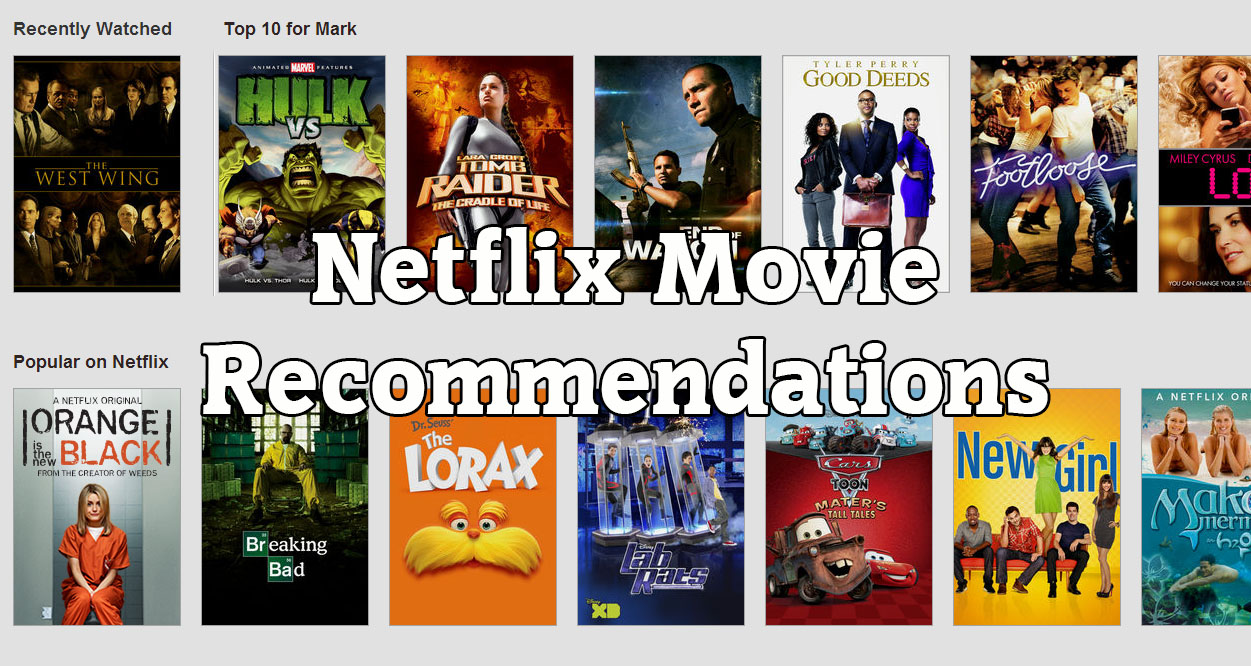

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Acer/csv files/movie_metadata.csv')

In [3]:

df.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [4]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

# EDA
Minimum and Maximum

In [6]:

# highest and lowest duration of movie

print('Maximum length of the movie in minutes: ',df['duration'].max())
print('Movie Name:',df[df['duration']==df['duration'].max()]['movie_title'],'\n')

print('Maximum length of the movie in minutes: ',df['duration'].min())
print('Movie Name:',df[df['duration']==df['duration'].min()]['movie_title'],'\n')

Maximum length of the movie in minutes:  511.0
Movie Name: 1710    Trapped             
Name: movie_title, dtype: object 

Maximum length of the movie in minutes:  7.0
Movie Name: 1947    Shaun the Sheep             
2345                      The Touch 
Name: movie_title, dtype: object 



In [7]:

# highest and lowest rating by IMDB


print('highest rated movie:',df['imdb_score'].max(),'Movie Name:',df[df['imdb_score']==df['imdb_score'].max()]['movie_title'])



print('\nLowest rated movie:',df['imdb_score'].min(),'Movie Name:',df[df['imdb_score']==df['imdb_score'].min()]['movie_title'])

highest rated movie: 9.5 Movie Name: 2765    Towering Inferno             
Name: movie_title, dtype: object

Lowest rated movie: 1.6 Movie Name: 2834    Justin Bieber: Never Say Never 
Name: movie_title, dtype: object


In [8]:

# highest and lowest  User reviews movie

print('highest No.of Critic reviews  movie:',df['num_critic_for_reviews'].max(),'Movie Name:',df[df['num_critic_for_reviews']==df['num_critic_for_reviews'].max()]['movie_title'])



print('\nLowest  No.of Critic reviews  movie:',df['num_critic_for_reviews'].min(),'Movie Name:',df[df['num_critic_for_reviews']==df['num_critic_for_reviews'].min()]['movie_title'][:1])


highest No.of Critic reviews  movie: 813.0 Movie Name: 3    The Dark Knight Rises 
Name: movie_title, dtype: object

Lowest  No.of Critic reviews  movie: 1.0 Movie Name: 98    Godzilla Resurgence 
Name: movie_title, dtype: object


In [9]:

# highest and lowest  User reviews movie

print('highest User Reviews movie:',df['num_user_for_reviews'].max(),'Movie Name:',df[df['num_user_for_reviews']==df['num_user_for_reviews'].max()]['movie_title'])



print('\nLowest User Revies movie:',df['num_user_for_reviews'].min(),'Movie Name:',df[df['num_user_for_reviews']==df['num_user_for_reviews'].min()]['movie_title'][:1])


highest User Reviews movie: 5060.0 Movie Name: 270    The Lord of the Rings: The Fellowship of the R...
Name: movie_title, dtype: object

Lowest User Revies movie: 1.0 Movie Name: 367    Ben-Hur 
Name: movie_title, dtype: object


In [10]:

# highest and lowest  Budget movie

print('highest liked movie in FB:',df['movie_facebook_likes'].max(),'Movie Name:',df[df['movie_facebook_likes']==df['movie_facebook_likes'].max()]['movie_title'])



print('\nLowest liked movie in FB:',df['movie_facebook_likes'].min(),'Movie Name:',df[df['movie_facebook_likes']==df['movie_facebook_likes'].min()]['movie_title'][:1])


highest liked movie in FB: 349000 Movie Name: 96    Interstellar 
Name: movie_title, dtype: object

Lowest liked movie in FB: 0 Movie Name: 1    Pirates of the Caribbean: At World's End 
Name: movie_title, dtype: object


In [11]:

# highest and lowest  Budget movie

print('highest budget movie:',df['budget'].max(),'Movie Name:',df[df['budget']==df['budget'].max()]['movie_title'])



print('\nLowest budget movie:',df['budget'].min(),'Movie Name:',df[df['budget']==df['budget'].min()]['movie_title'])

highest budget movie: 12215500000.0 Movie Name: 2988    The Host 
Name: movie_title, dtype: object

Lowest budget movie: 218.0 Movie Name: 4799    Tarnation 
Name: movie_title, dtype: object


In [12]:

# highest and lowest  Gross movie

print('highest Gross movie:',df['gross'].max(),'Movie Name:',df[df['gross']==df['gross'].max()]['movie_title'])



print('\nLowest Gross movie:',df['gross'].min(),'Movie Name:',df[df['gross']==df['gross'].min()]['movie_title'])

highest Gross movie: 760505847.0 Movie Name: 0    Avatar 
Name: movie_title, dtype: object

Lowest Gross movie: 162.0 Movie Name: 3330    Skin Trade 
Name: movie_title, dtype: object


Color               4815
 Black and White     209
Name: color, dtype: int64

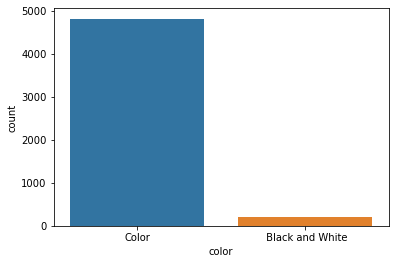

In [13]:
sns.countplot(df['color'])
df['color'].value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Italian         11
Russian         11
Korean           8
Portuguese       8
Swedish          5
Danish           5
Hebrew           5
Arabic           5
Polish           4
Dutch            4
Persian          4
Norwegian        4
Thai             3
Chinese          3
Romanian         2
None             2
Zulu             2
Indonesian       2
Aboriginal       2
Dari             2
Icelandic        2
Maya             1
Bosnian          1
Kannada          1
Aramaic          1
Mongolian        1
Czech            1
Greek            1
Tamil            1
Panjabi          1
Filipino         1
Slovenian        1
Vietnamese       1
Hungarian        1
Telugu           1
Urdu             1
Swahili          1
Dzongkha         1
Kazakh           1
Name: language, dtype: int64

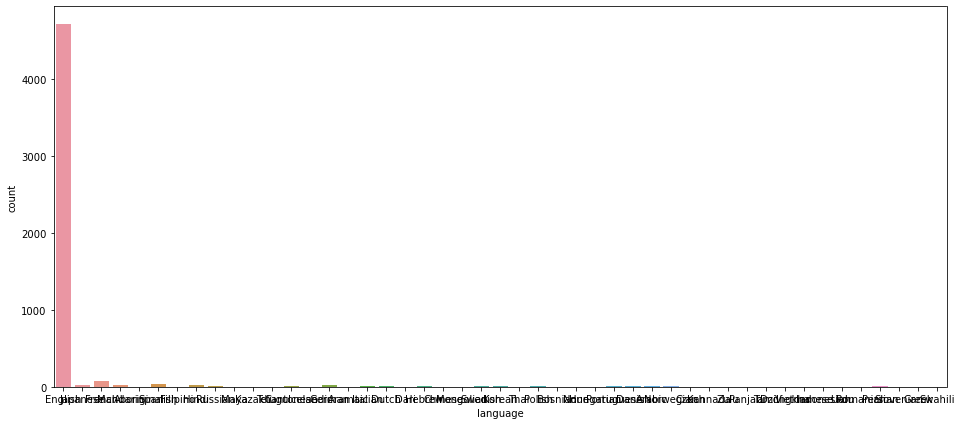

In [14]:
plt.figure(figsize=(16,7))
sns.countplot(df['language'])
df['language'].value_counts()

USA                     3807
UK                       448
France                   154
Canada                   126
Germany                   97
                        ... 
Kyrgyzstan                 1
United Arab Emirates       1
Bulgaria                   1
Pakistan                   1
Slovenia                   1
Name: country, Length: 65, dtype: int64

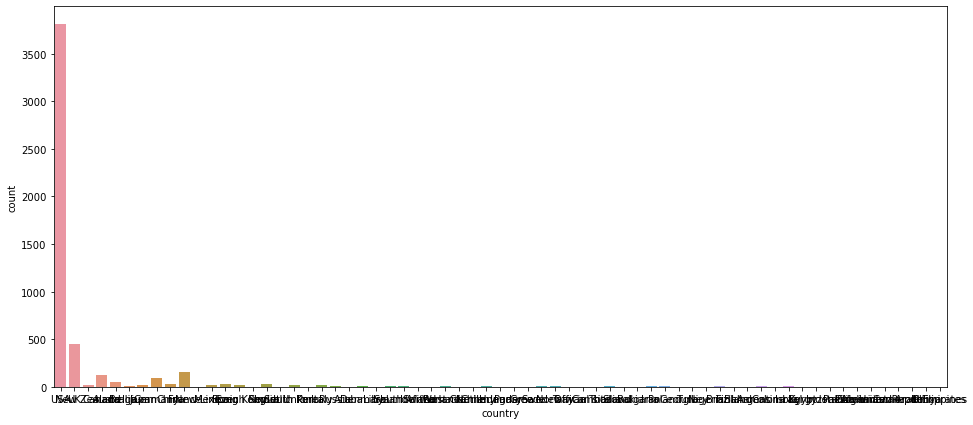

In [15]:
plt.figure(figsize=(16,7))
sns.countplot(df['country'])
df['country'].value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
TV-PG          13
X              13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: content_rating, dtype: int64

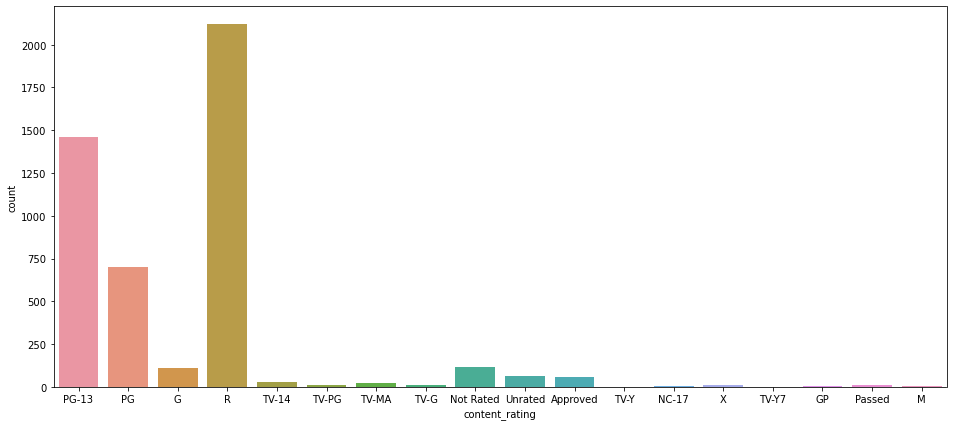

In [16]:

plt.figure(figsize=(16,7))
sns.countplot(df['content_rating'])
df['content_rating'].value_counts()


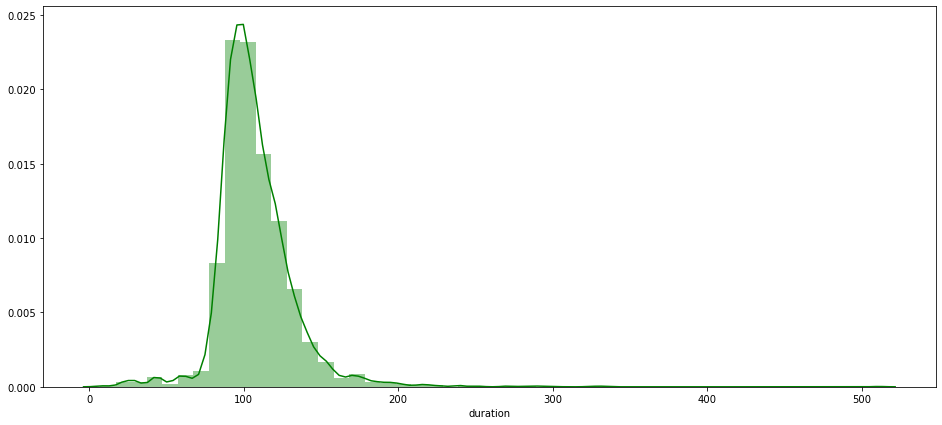

In [17]:
plt.figure(figsize=(16,7))
sns.distplot(df['duration'].dropna(axis=0),color='g')
plt.show()

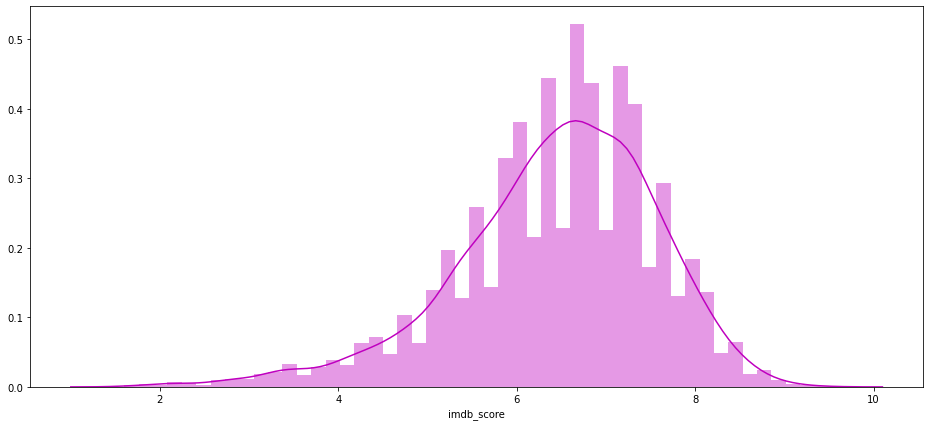

6.7    223
6.6    201
7.2    195
6.5    186
6.4    185
      ... 
9.3      1
1.7      1
9.5      1
9.2      1
1.6      1
Name: imdb_score, Length: 78, dtype: int64

In [18]:
plt.figure(figsize=(16,7))
sns.distplot(df['imdb_score'].dropna(axis=0),color='m')
plt.show()
df['imdb_score'].value_counts()


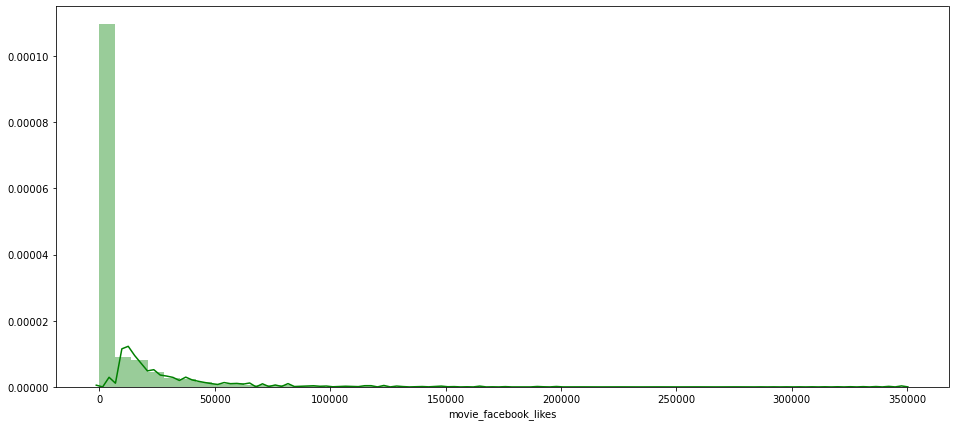

0        2181
1000      109
11000      83
10000      81
12000      62
         ... 
68000       1
417         1
938         1
429         1
46          1
Name: movie_facebook_likes, Length: 876, dtype: int64

In [19]:
plt.figure(figsize=(16,7))
sns.distplot(df['movie_facebook_likes'].dropna(axis=0),color='g')
plt.show()
df['movie_facebook_likes'].value_counts()

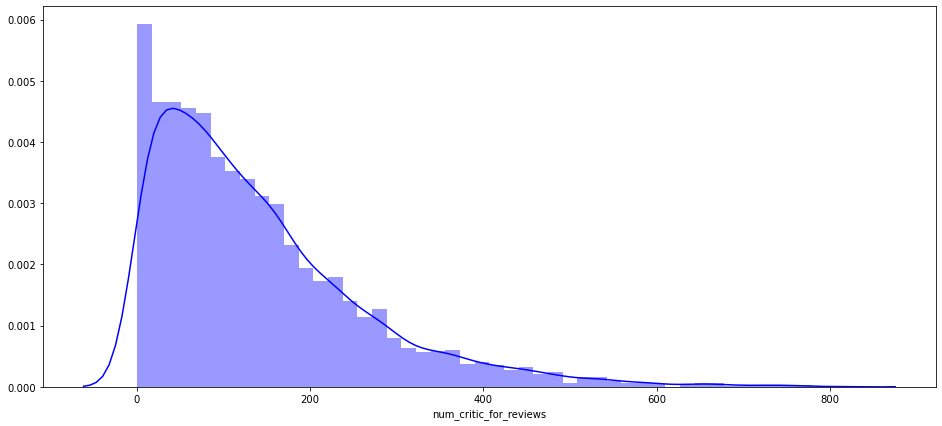

1.0      43
9.0      37
5.0      36
10.0     35
8.0      35
         ..
460.0     1
410.0     1
765.0     1
502.0     1
775.0     1
Name: num_critic_for_reviews, Length: 528, dtype: int64

In [20]:
plt.figure(figsize=(16,7))
sns.distplot(df['num_critic_for_reviews'].dropna(axis=0),color='b')
plt.show()
df['num_critic_for_reviews'].value_counts()

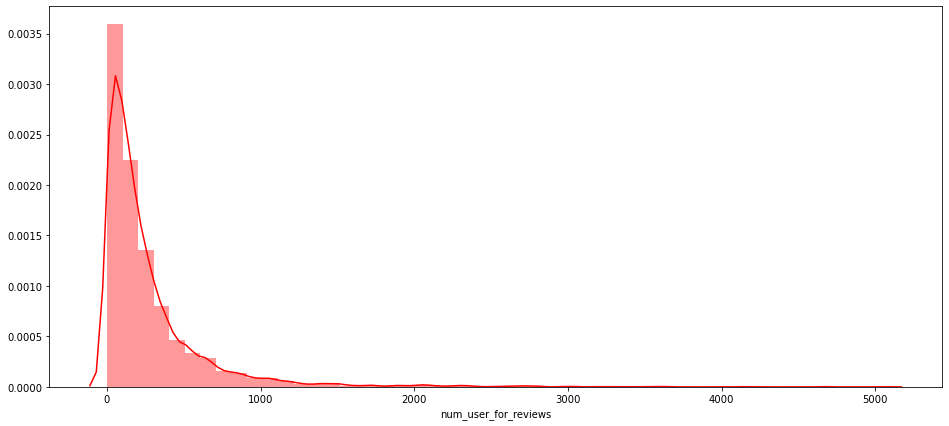

1.0       51
3.0       33
2.0       32
26.0      32
10.0      29
          ..
2968.0     1
722.0      1
381.0      1
1109.0     1
484.0      1
Name: num_user_for_reviews, Length: 954, dtype: int64

In [21]:
plt.figure(figsize=(16,7))
sns.distplot(df['num_user_for_reviews'].dropna(axis=0),color='r')
plt.show()
df['num_user_for_reviews'].value_counts()

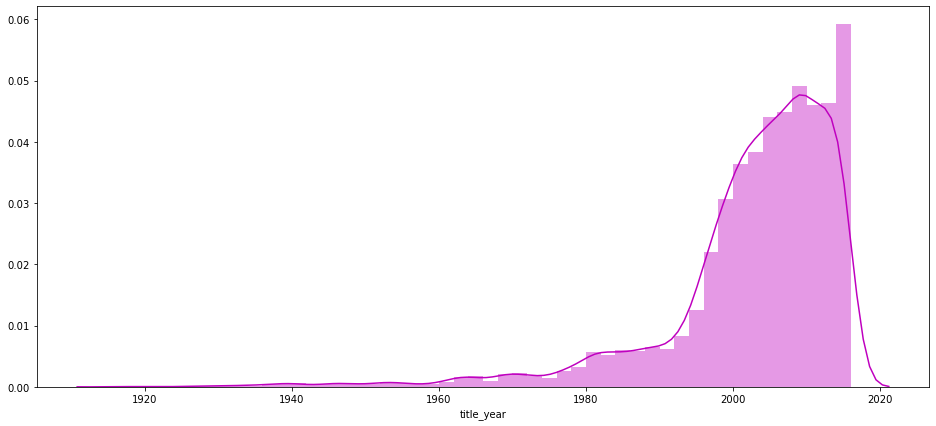

2009.0    260
2014.0    252
2006.0    239
2013.0    237
2010.0    230
         ... 
1930.0      1
1944.0      1
1958.0      1
1935.0      1
1927.0      1
Name: title_year, Length: 91, dtype: int64

In [22]:

plt.figure(figsize=(16,7))
sns.distplot(df['title_year'].dropna(axis=0),color='m')
plt.show()
df['title_year'].value_counts()


<h1 style="background-color:YELLOW;font-family:Georgia;font-size:350%;text-align:center">PreProcessing </h1>


In [23]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

Keep the columns which are useful to recommendations¶

In [24]:
# we know that title, genre,actor,director are the most useful columns to recommndation system.
# So keep those columns and make them new dataset.

data = df.loc[:,['actor_1_name','actor_2_name','actor_3_name','director_name','genres','movie_title']]

In [25]:
data.head(10)

,actor_1_name,actor_2_name,actor_3_name,director_name,genres,movie_title
0,CCH Pounder,Joel David Moore,Wes Studi,James Cameron,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Johnny Depp,Orlando Bloom,Jack Davenport,Gore Verbinski,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Sam Mendes,Action|Adventure|Thriller,Spectre
3,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Christopher Nolan,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Rob Walker,NaN,Doug Walker,Documentary,Star Wars: Episode VII - The Force Awakens ...
5,Daryl Sabara,Samantha Morton,Polly Walker,Andrew Stanton,Action|Adventure|Sci-Fi,John Carter
6,J.K. Simmons,James Franco,Kirsten Dunst,Sam Raimi,Action|Adventure|Romance,Spider-Man 3
7,Brad Garrett,Donna Murphy,M.C. Gainey,Nathan Greno,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled
8,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Joss Whedon,Action|Adventure|Sci-Fi,Avengers: Age of Ultron
9,Alan Rickman,Daniel Radcliffe,Rupert Grint,David Yates,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   actor_1_name   5036 non-null   object
 1   actor_2_name   5030 non-null   object
 2   actor_3_name   5020 non-null   object
 3   director_name  4939 non-null   object
 4   genres         5043 non-null   object
 5   movie_title    5043 non-null   object
dtypes: object(6)
memory usage: 236.5+ KB


In [27]:
data.isna().sum()

actor_1_name       7
actor_2_name      13
actor_3_name      23
director_name    104
genres             0
movie_title        0
dtype: int64

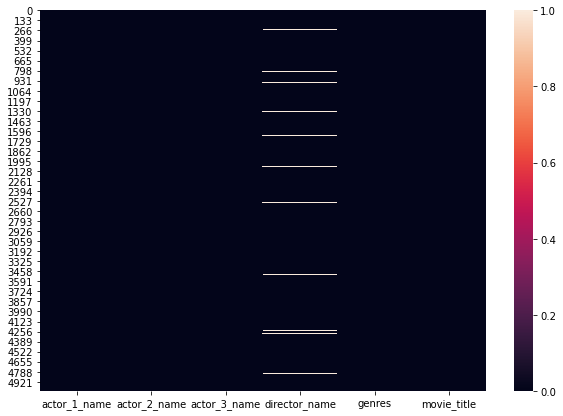

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isna())

In [29]:
# replacing null values in the all columns with string 'unknown'
data['actor_1_name'] = data['actor_1_name'].replace(np.nan, 'unknown')
data['actor_2_name'] = data['actor_2_name'].replace(np.nan, 'unknown')
data['actor_3_name'] = data['actor_3_name'].replace(np.nan, 'unknown')
data['director_name'] = data['director_name'].replace(np.nan, 'unknown')

In [30]:
data.isna().sum()

actor_1_name     0
actor_2_name     0
actor_3_name     0
director_name    0
genres           0
movie_title      0
dtype: int64

In [31]:
data['genres'][1]

'Action|Adventure|Fantasy'

In [32]:
data['genres'][0].replace('|',' ')

'Action Adventure Fantasy Sci-Fi'

In [33]:
data['genres'] = data['genres'].str.replace('|',' ')

In [34]:
data['movie_title'] = data['movie_title'].str.lower()

In [35]:
data['movie_title'][0]

'avatar\xa0'

In [36]:
data['movie_title'][99]

'the hobbit: an unexpected journey\xa0'

In [37]:
data['movie_title'][0][:-1]

'avatar'

In [38]:
data['movie_title'][99][:-1]

'the hobbit: an unexpected journey'

In [39]:
data['movie_title'] = data['movie_title'].str[:-1]

In [40]:
data.to_csv('movie_data.csv',index=False)

<h1 style="background-color:red;font-family:Georgia;font-size:350%;text-align:center">data modeling analysis </h1>


In [41]:
df = pd.read_csv('movie_data.csv')


In [42]:
df.head()

,actor_1_name,actor_2_name,actor_3_name,director_name,genres,movie_title
0,CCH Pounder,Joel David Moore,Wes Studi,James Cameron,Action Adventure Fantasy Sci-Fi,avatar
1,Johnny Depp,Orlando Bloom,Jack Davenport,Gore Verbinski,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Sam Mendes,Action Adventure Thriller,spectre
3,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Christopher Nolan,Action Thriller,the dark knight rises
4,Doug Walker,Rob Walker,unknown,Doug Walker,Documentary,star wars: episode vii - the force awakens ...


In [43]:
df['comb'] = df['actor_1_name']+' '+df['actor_2_name']+' '+df['actor_3_name']+' '+df['movie_title']+' '+df['director_name']+' '+df['genres']

In [44]:
df['comb'][1]

"Johnny Depp Orlando Bloom Jack Davenport pirates of the caribbean: at world's end Gore Verbinski Action Adventure Fantasy"

In [45]:
df.head(10)

,actor_1_name,actor_2_name,actor_3_name,director_name,genres,movie_title,comb
0,CCH Pounder,Joel David Moore,Wes Studi,James Cameron,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi avatar ...
1,Johnny Depp,Orlando Bloom,Jack Davenport,Gore Verbinski,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport pirat...
2,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Sam Mendes,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Christopher Nolan,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Rob Walker,unknown,Doug Walker,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown star wars: epis...
5,Daryl Sabara,Samantha Morton,Polly Walker,Andrew Stanton,Action Adventure Sci-Fi,john carter,Daryl Sabara Samantha Morton Polly Walker john...
6,J.K. Simmons,James Franco,Kirsten Dunst,Sam Raimi,Action Adventure Romance,spider-man 3,J.K. Simmons James Franco Kirsten Dunst spider...
7,Brad Garrett,Donna Murphy,M.C. Gainey,Nathan Greno,Adventure Animation Comedy Family Fantasy Musi...,tangled,Brad Garrett Donna Murphy M.C. Gainey tangled ...
8,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Joss Whedon,Action Adventure Sci-Fi,avengers: age of ultron,Chris Hemsworth Robert Downey Jr. Scarlett Joh...
9,Alan Rickman,Daniel Radcliffe,Rupert Grint,David Yates,Adventure Family Fantasy Mystery,harry potter and the half-blood prince,Alan Rickman Daniel Radcliffe Rupert Grint har...


In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [47]:
#print('count',count_vect.get_feature_names()[:50])
count_vect = CountVectorizer()
count_matrix = count_vect.fit_transform(df['comb'])

In [48]:
similar = cosine_similarity(count_matrix)
similar

array([[1.        , 0.18257419, 0.1490712 , ..., 0.06900656, 0.        ,
        0.        ],
       [0.18257419, 1.        , 0.13608276, ..., 0.        , 0.        ,
        0.        ],
       [0.1490712 , 0.13608276, 1.        , ..., 0.07715167, 0.        ,
        0.        ],
       ...,
       [0.06900656, 0.        , 0.07715167, ..., 1.        , 0.06900656,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.06900656, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [49]:
# getting the index of the movie in the dataframe
movie_index =  df.loc[df['movie_title']=='avatar'].index[0]

In [50]:
# fetching the row containing similarity scores of the movie
lst = list(enumerate(similar[movie_index]))

In [51]:
lst

[(0, 0.9999999999999998),
 (1, 0.18257418583505536),
 (2, 0.14907119849998599),
 (3, 0.06666666666666665),
 (4, 0.0),
 (5, 0.2760262237369417),
 (6, 0.223606797749979),
 (7, 0.1333333333333333),
 (8, 0.25048971643405976),
 (9, 0.17770466332772766),
 (10, 0.25048971643405976),
 (11, 0.2760262237369417),
 (12, 0.14322297480788657),
 (13, 0.18257418583505536),
 (14, 0.13801311186847084),
 (15, 0.32274861218395134),
 (16, 0.18257418583505536),
 (17, 0.2666666666666666),
 (18, 0.18257418583505536),
 (19, 0.3042903097250923),
 (20, 0.15811388300841897),
 (21, 0.19999999999999996),
 (22, 0.12909944487358055),
 (23, 0.18257418583505536),
 (24, 0.1333333333333333),
 (25, 0.13801311186847084),
 (26, 0.1556997888323046),
 (27, 0.25048971643405976),
 (28, 0.2760262237369417),
 (29, 0.2581988897471611),
 (30, 0.14907119849998599),
 (31, 0.28644594961577313),
 (32, 0.2666666666666666),
 (33, 0.13801311186847084),
 (34, 0.3042903097250923),
 (35, 0.1333333333333333),
 (36, 0.25048971643405976),
 (37,

In [52]:
lst = sorted(lst, key = lambda x:x[1] ,reverse=True)

In [53]:
lst[:10]

[(0, 0.9999999999999998),
 (2486, 0.4296689244236597),
 (637, 0.3999999999999999),
 (1127, 0.3999999999999999),
 (1702, 0.37573457465108967),
 (675, 0.36514837167011077),
 (60, 0.35805743701971643),
 (1112, 0.35805743701971643),
 (2112, 0.35805743701971643),
 (3575, 0.35805743701971643)]

In [54]:
top_10 = lst[:10]

In [55]:
movies=[]
for i in range(len(top_10)):
    
    a = top_10[i][0]
    movies.append(df['movie_title'][a])

In [56]:
movies

['avatar',
 'aliens',
 'mystery men',
 'deep rising',
 'dragonball: evolution',
 'blade: trinity',
 '2012',
 'dune',
 'robocop 3',
 'the terminator']

In [57]:

def top_recomendations(movie):
    movie_index =  df.loc[df['movie_title']==movie].index[0]
    lst = list(enumerate(similar[movie_index]))
    lst = sorted(lst, key = lambda x:x[1] ,reverse=True)
    top_10 = lst[1:11]
    
    l=[]
    for i in range(len(top_10)):
    
        a = top_10[i][0]
        l.append(df['movie_title'][a])
        
    return l

In [58]:
print(top_recomendations('avatar'))

['aliens', 'mystery men', 'deep rising', 'dragonball: evolution', 'blade: trinity', '2012', 'dune', 'robocop 3', 'the terminator', 'revolution\xa0           ']


In [59]:
print(top_recomendations('the terminator'))

['aliens', 'the abyss', 'megiddo: the omega code 2', 'terminator 2: judgment day', 'battle for the planet of the apes', 'the running man', 'damnation alley', 'the one', 'the divide', 'avatar']


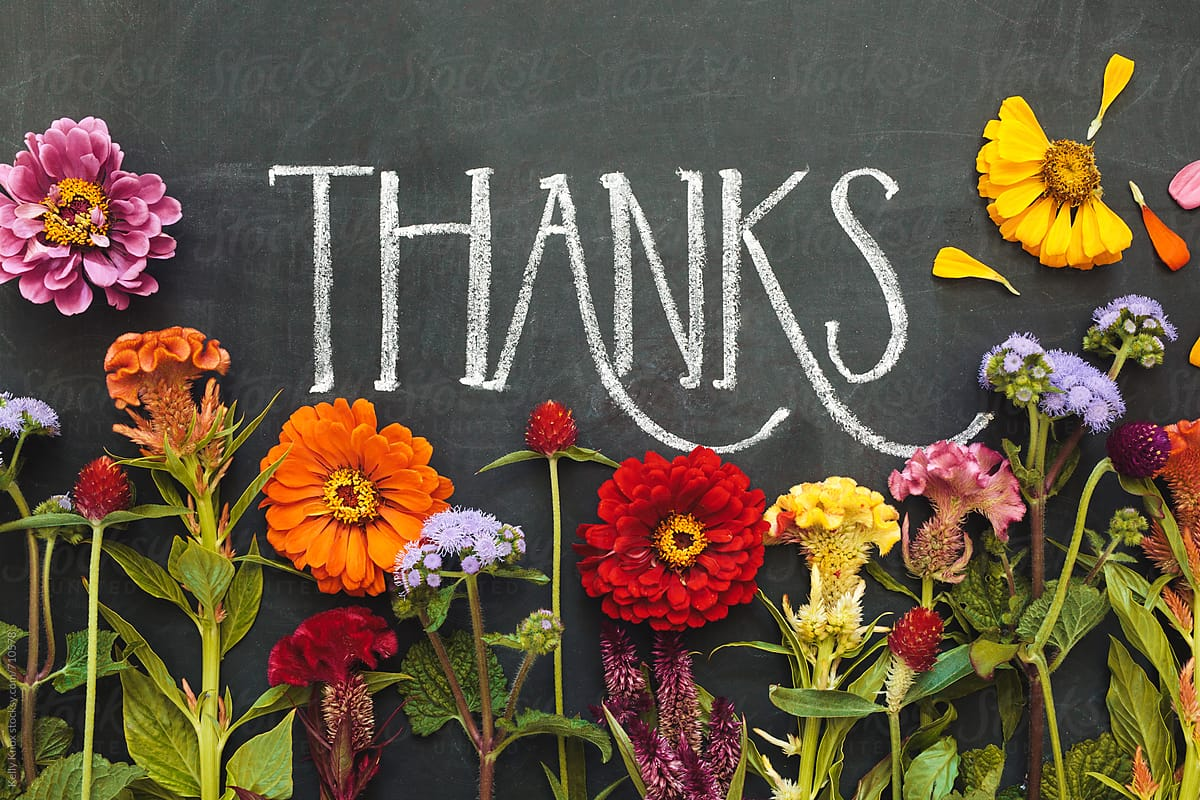